In [1]:
import numpy as np
from utils.ifa_meander_project.meander_function import *

In [2]:
mesh_name = "ifa_meander_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [3]:
fC      = 868e6
fLow    = 820e6
fHigh   = 940e6
nPoints = calculate_nPoints(fLow, fHigh, fC)
accuracy= 0.01
print(f"nPoints = {nPoints}")

nPoints = 6


In [4]:
vitesse_lumiere = 3.0e8  # en mètres par seconde (m/s)
longueur_onde = vitesse_lumiere / fC 
quart_d_onde = longueur_onde / 4

print(f"Pour la fréquence de raisonnance {fC} Hz :")
print(f"Longueur d'onde (λ) = {longueur_onde} m")
print(f"Quart d'onde (λ/4) = {quart_d_onde} m")

Pour la fréquence de raisonnance 868000000.0 Hz :
Longueur d'onde (λ) = 0.3456221198156682 m
Quart d'onde (λ/4) = 0.08640552995391705 m


In [5]:
frequencies = np.linspace(fLow, fHigh, nPoints)
print("Liste des frequences : ")
count = 1
for frequency in frequencies:
    print(f"Simulation Numéro {count} = {frequency / 1e6:.2f} MHz")
    count += 1

Liste des frequences : 
Simulation Numéro 1 = 820.00 MHz
Simulation Numéro 2 = 844.00 MHz
Simulation Numéro 3 = 868.00 MHz
Simulation Numéro 4 = 892.00 MHz
Simulation Numéro 5 = 916.00 MHz
Simulation Numéro 6 = 940.00 MHz


In [6]:
# Terminal size 
t_a = 50 / 1000   # Hauteur
a = 15 / 1000 
t_b = 30 / 1000  # Largeur
b = t_b
x_t = np.array([-t_a, 0, 0, -t_a])
y_t = np.array([t_b/2, t_b/2, -t_b/2, -t_b/2])

In [7]:
# Génération des points du contour IFA
# wid has to be less than min_slot       
# wid = 1.075 / 1000    # Largeur des branches
wid = 1 / 1000    # Largeur des branches
# min_slot = 3 / 1000
L_short = 1.15 / 1000
Lenght_antenna = quart_d_onde

# feed_wid = 1 / 1000
feed_wid = wid
# feed_point = [0, t_b/2 - wid/2, 0]
distance_short = t_b/2
# distance_short = 1 / 1000 + wid
# distance_short = 7.77 / 1000
feed = t_b/2 - distance_short
feed_point = [0, feed, 0]

x, y = ifa_creation_new(Lenght_antenna, a, b, wid, L_short)
# x, y, longueur_meandre = ifa_creation_center(Lenght_antenna, a, b, wid, min_slot)

# print(f"Longueur Meandre = {longueur_meandre}")
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
s11_db, f_resonance, has_converged = simulate_freq_loop(fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point)
plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)


Number of meanders 2
distance meandres 0.006925
last index = 5

longueur_obtenue = 0.064925
longueur_desiree = 0.08640552995391705 


Iteration 1

wid = 1.0
short feed = 15.0
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully
Simulation Numéro 1

paramètre S11 = -0.10142190903837334 db

Simulation Numéro 2

paramètre S11 = -0.13371502397772922 db

Simulation Numéro 3



paramètre S11 = -0.17776763331548256 db

Simulation Numéro 4

paramètre S11 = -0.23886612959224204 db

Simulation Numéro 5

paramètre S11 = -0.32530755240540843 db

Simulation Numéro 6

paramètre S11 = -0.45054558569459613 db

R_I_min_index = 8.97360907880848

Fréquence de résonance : 940.00 MHz

f_resonance > fC

new_Nombre_meandre = 5

new_wid = 0.6029325707432022

 Pas de convergence : |f_res - fC| = 0.08 Hz > 0.01

1...........short feed ...... dans la fonction = 15.0


2...........short feed = 15.0


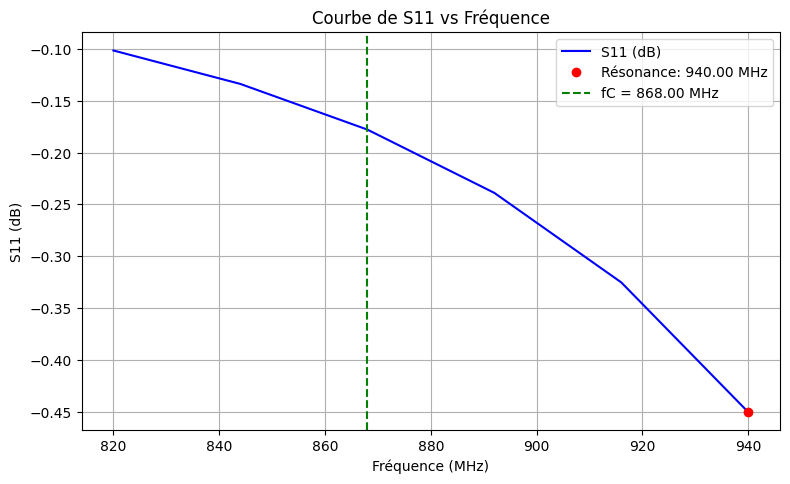

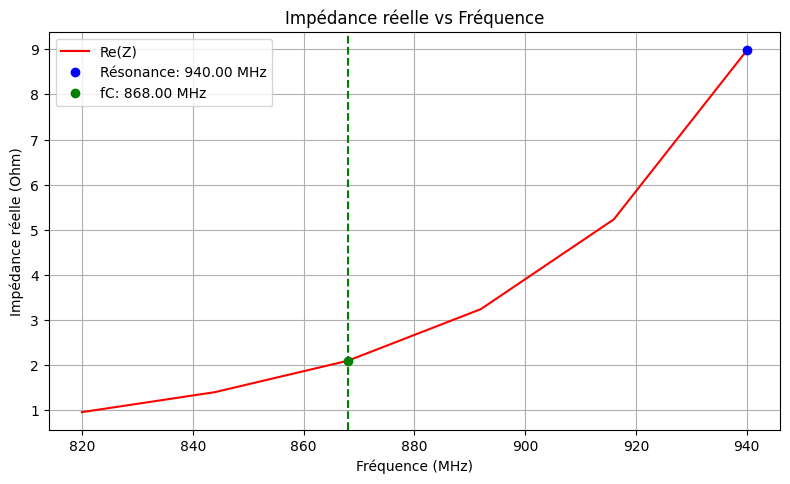

Number of meanders 5
distance meandres 0.00277
last index = 11

longueur_obtenue = 0.14975533714628397
longueur_desiree = 0.08640552995391705 


Iteration 2

wid = 0.6029325707432022
short feed = 15.0
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully
Simulation Numéro 1

paramètre S11 = -7.045838528250402 db

Simulation Numéro 2

paramètre S11 = -2.953414270089821 db

Simulation Numéro 3



paramètre S11 = -1.236957730465213 db

Simulation Numéro 4

paramètre S11 = -0.667823017424489 db

Simulation Numéro 5

paramètre S11 = -0.42217743096584986 db

Simulation Numéro 6

paramètre S11 = -0.29436839856969743 db

R_I_min_index = 25.791052005341644

Fréquence de résonance : 820.00 MHz

f_resonance < fC

new_Nombre_meandre = 4

new_wid = 0.6755857661802891

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 15.0


2...........short feed = 15.0


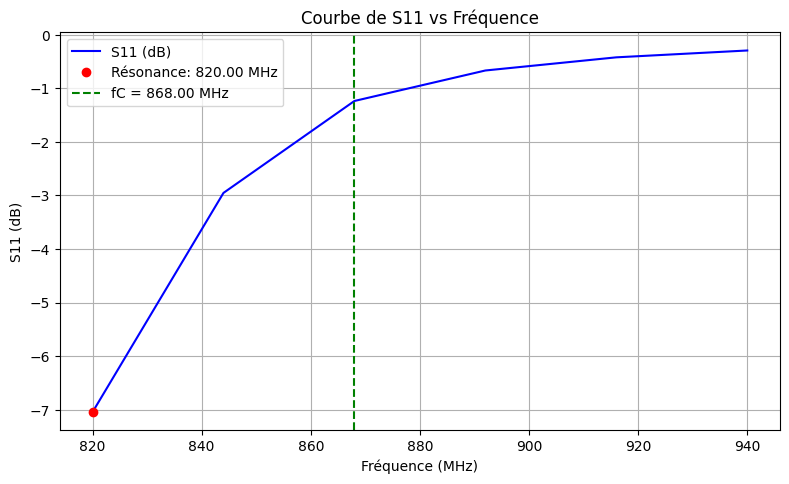

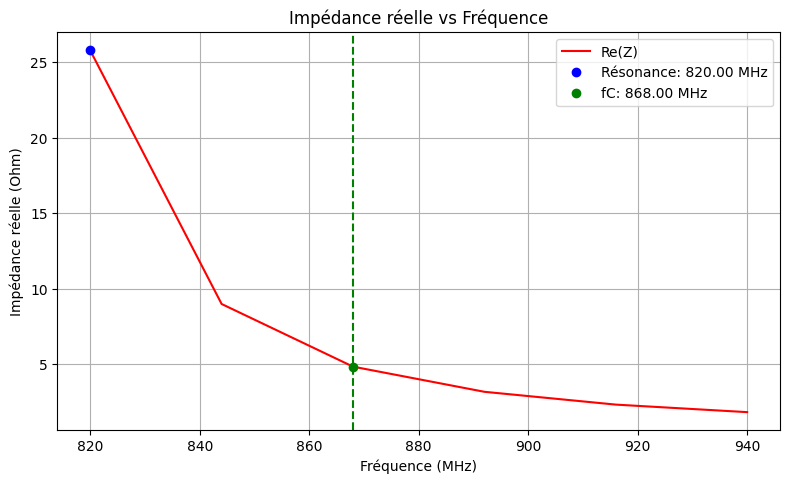

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12076015693527883
longueur_desiree = 0.08640552995391705 


Iteration 3

wid = 0.6755857661802891
short feed = 15.0
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully
Simulation Numéro 1

paramètre S11 = -0.9832349258091676 db

Simulation Numéro 2

paramètre S11 = -2.2768415911273494 db

Simulation Numéro 3



paramètre S11 = -5.927116766744884 db

Simulation Numéro 4

paramètre S11 = -6.445548775811886 db

Simulation Numéro 5

paramètre S11 = -2.8795873035866264 db

Simulation Numéro 6

paramètre S11 = -1.4732384928338056 db

R_I_min_index = 18.116585801558582

Fréquence de résonance : 892.00 MHz


2...........short feed = 15.0


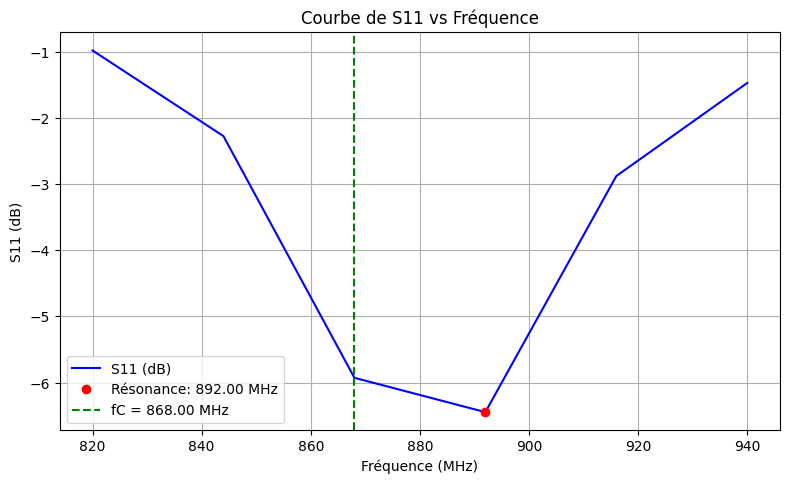

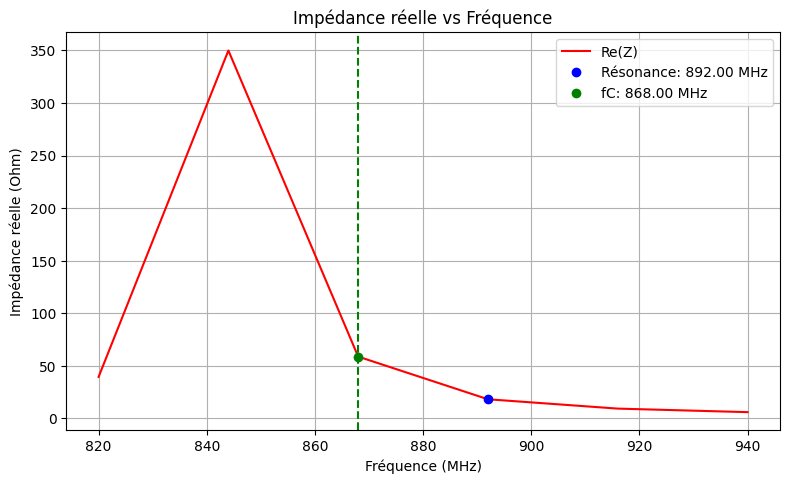

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12076015693527883
longueur_desiree = 0.08640552995391705 

On est dans la plage de convergence
wid = 0.6755857661802891
short feed = 15.0
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.9832349258091676 db

Simulation Numéro 2

paramètre S11 = -2.2768415911273494 db

Simulation Numéro 3



paramètre S11 = -5.927116766744884 db

Simulation Numéro 4

paramètre S11 = -6.445548775811886 db

Simulation Numéro 5

paramètre S11 = -2.8795873035866264 db

Simulation Numéro 6

paramètre S11 = -1.4732384928338056 db

R_I_min_index = 18.116585801558582

Fréquence de résonance : 892.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 4.440850731089234

 Pas de convergence : |f_res - fC| = 0.03 Hz > 0.01

1...........short feed ...... dans la fonction = 4.440850731089234



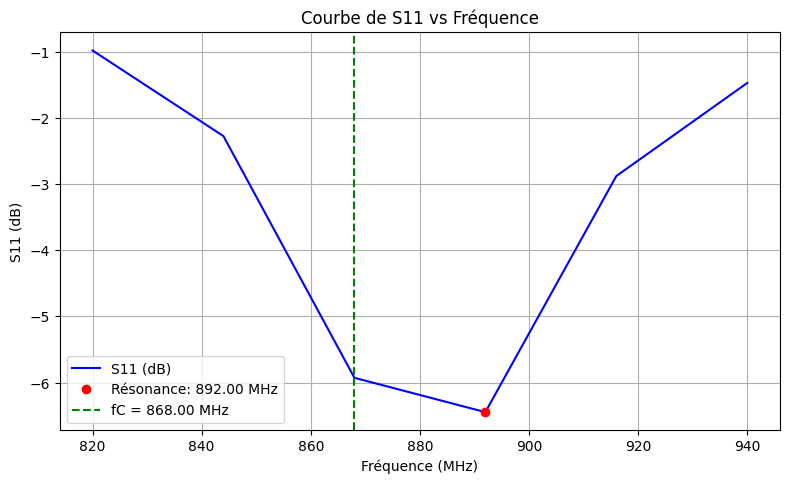

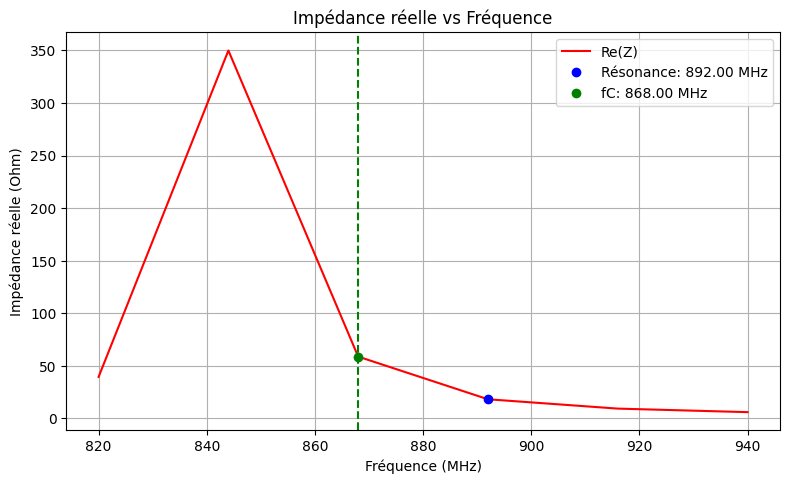

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12090361820920077
longueur_desiree = 0.08640552995391705 

wid = 0.6397204476998056
short feed = 4.440850731089234
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -1.6206503195966686 db

Simulation Numéro 2

paramètre S11 = -13.946484003071731 db

Simulation Numéro 3



paramètre S11 = -1.5536719277510436 db

Simulation Numéro 4

paramètre S11 = -0.5344326869667985 db

Simulation Numéro 5

paramètre S11 = -0.2808916779930468 db

Simulation Numéro 6

paramètre S11 = -0.18018918304688486 db

R_I_min_index = 33.935594104390574

Fréquence de résonance : 844.00 MHz

f_resonance > fLow and f_resonance < fHigh

 Pas de convergence : |f_res - fC| = 0.03 Hz > 0.01

1...........short feed ...... dans la fonction = 6.543057294692652



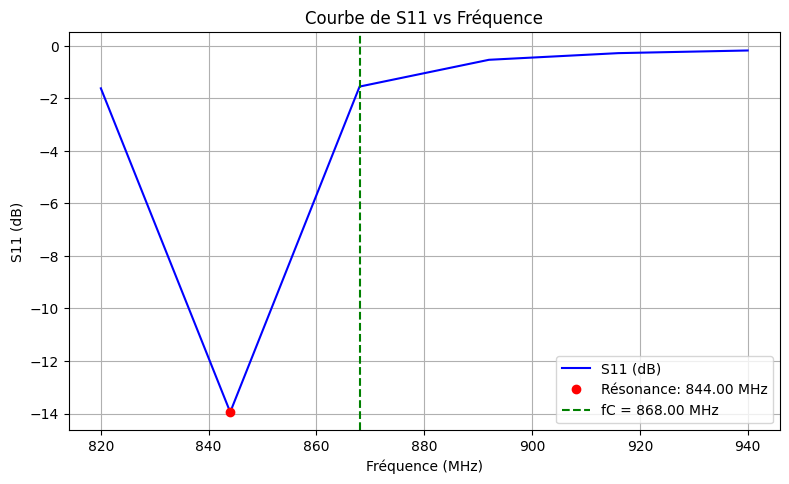

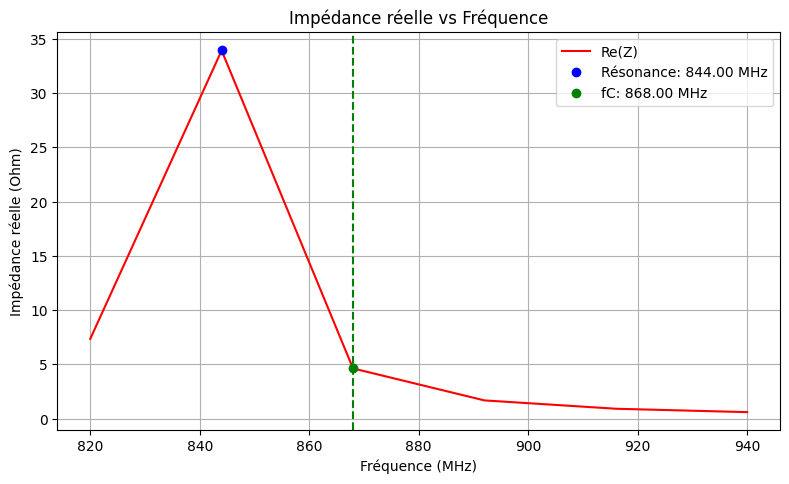

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12075602025680139
longueur_desiree = 0.08640552995391705 

wid = 0.6766199357996484
short feed = 6.543057294692652
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -1.4250381760510007 db

Simulation Numéro 2

paramètre S11 = -9.120686384539333 db

Simulation Numéro 3



paramètre S11 = -4.550378221693957 db

Simulation Numéro 4

paramètre S11 = -1.2748382438111505 db

Simulation Numéro 5

paramètre S11 = -0.6037303491642992 db

Simulation Numéro 6

paramètre S11 = -0.36426442509936546 db

R_I_min_index = 79.42547221012845

Fréquence de résonance : 844.00 MHz

f_resonance > fLow and f_resonance < fHigh

 Pas de convergence : |f_res - fC| = 0.03 Hz > 0.01

1...........short feed ...... dans la fonction = 4.118991749512238



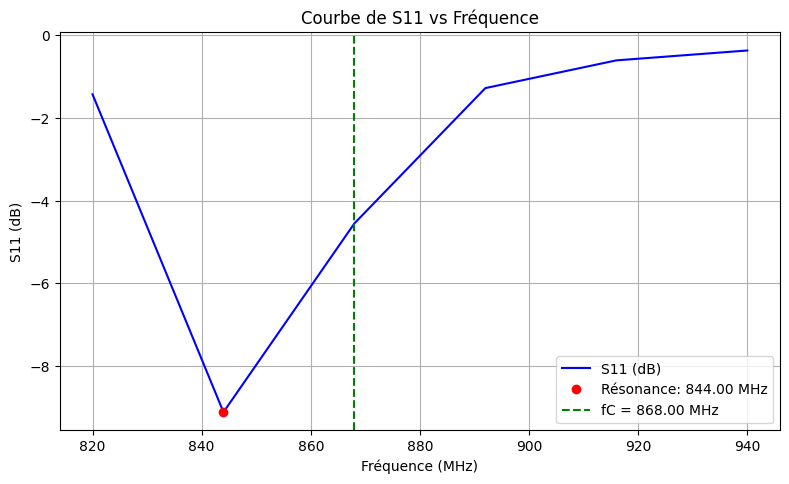

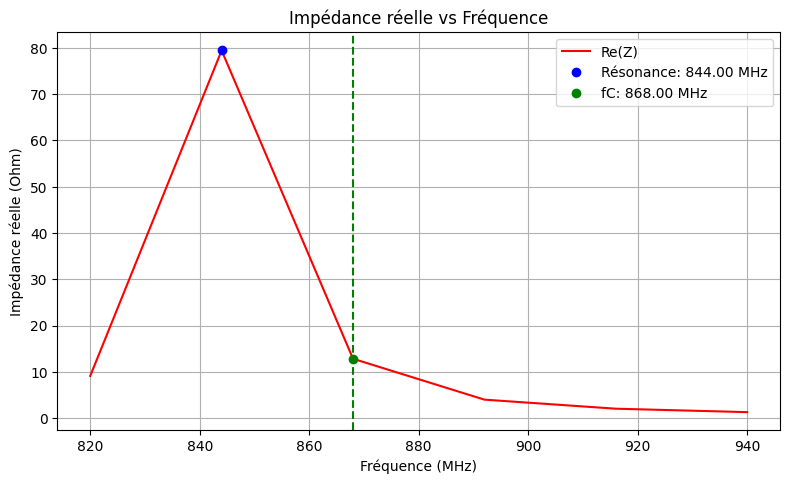

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12059990875929384
longueur_desiree = 0.08640552995391705 

wid = 0.715647810176538
short feed = 4.118991749512238
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.6750792172251869 db

Simulation Numéro 2

paramètre S11 = -4.608466151375758 db

Simulation Numéro 3



paramètre S11 = -3.4831109251137606 db

Simulation Numéro 4

paramètre S11 = -0.7890234216517211 db

Simulation Numéro 5

paramètre S11 = -0.3510193349554374 db

Simulation Numéro 6

paramètre S11 = -0.20691667101883873 db

R_I_min_index = 20.979780542188195

Fréquence de résonance : 844.00 MHz

f_resonance > fLow and f_resonance < fHigh

 Pas de convergence : |f_res - fC| = 0.03 Hz > 0.01

1...........short feed ...... dans la fonction = 9.816574918954387



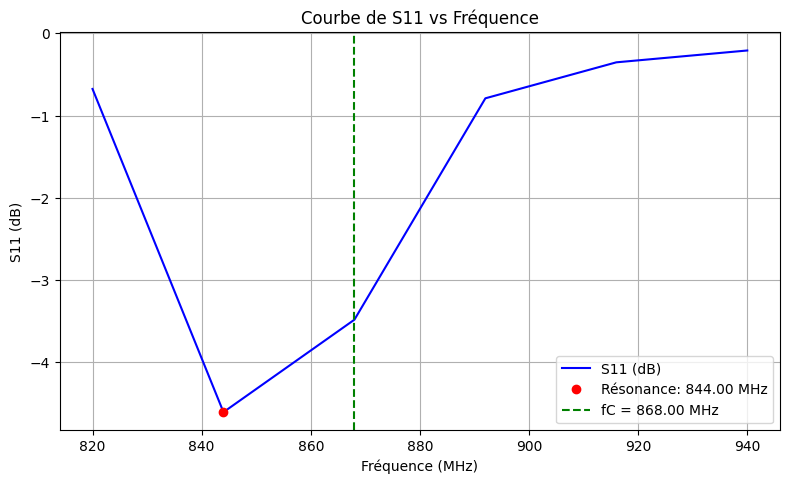

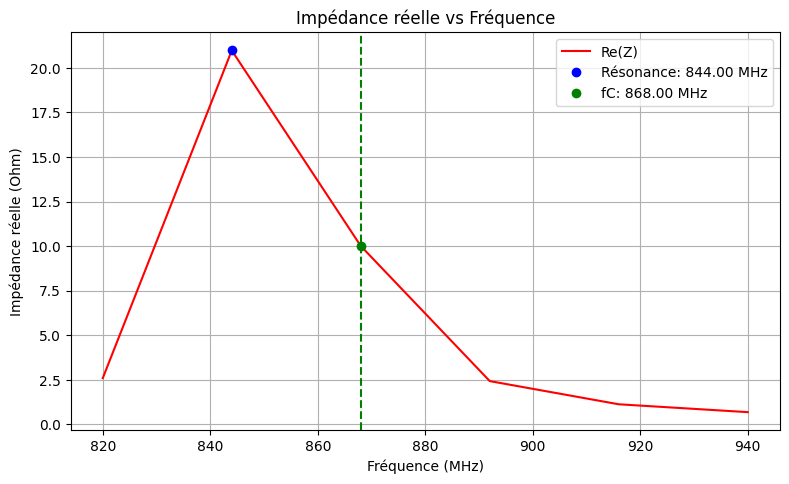

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12043479264990425
longueur_desiree = 0.08640552995391705 

wid = 0.7569268375239325
short feed = 9.816574918954387
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.8898964439657242 db

Simulation Numéro 2

paramètre S11 = -2.497650365976983 db

Simulation Numéro 3



paramètre S11 = -9.423571029436133 db

Simulation Numéro 4

paramètre S11 = -5.409310516552973 db

Simulation Numéro 5

paramètre S11 = -1.9812085229768517 db

Simulation Numéro 6

paramètre S11 = -1.008094356694718 db

R_I_min_index = 78.30229804874494

Fréquence de résonance : 868.00 MHz

 
Opti Freq found but no matching yet ! 

R_I_min_index = 78.30229804874494 Ohm

f_resonance > fLow and f_resonance < fHigh

 Pas de convergence : |f_res - fC| = 0.00 Hz > 0.01

1...........short feed ...... dans la fonction = 4.002680983298757



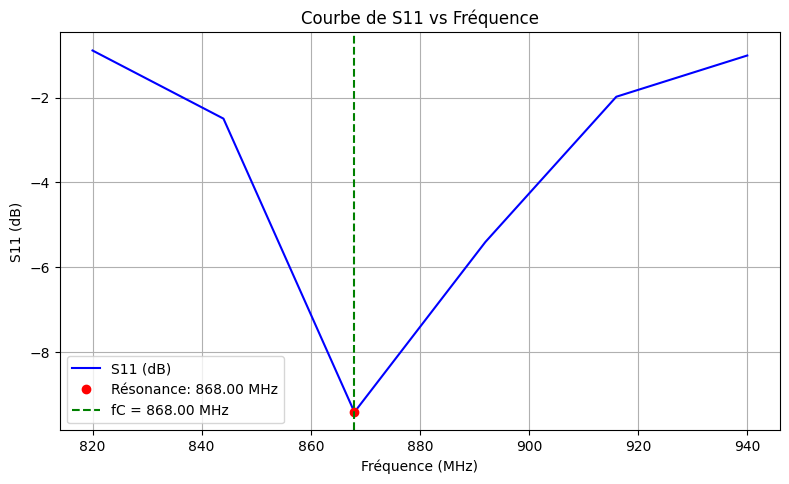

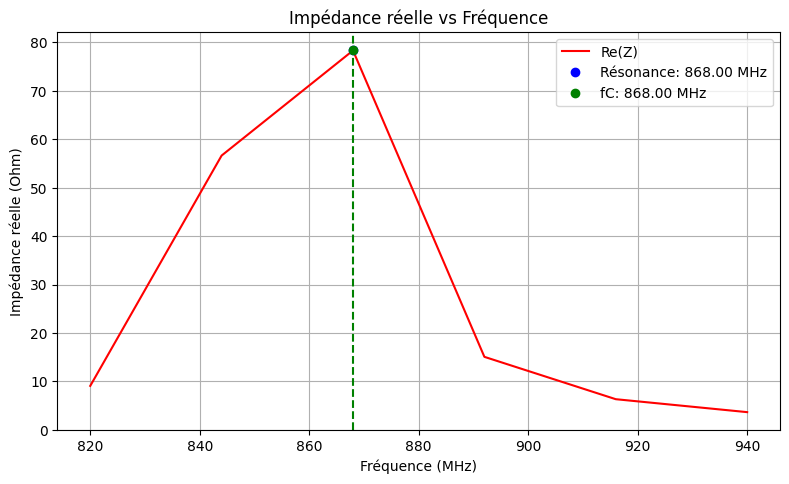

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12043479264990425
longueur_desiree = 0.08640552995391705 

wid = 0.7569268375239325
short feed = 4.002680983298757
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.4555844752179867 db

Simulation Numéro 2

paramètre S11 = -2.2773256278104457 db

Simulation Numéro 3



paramètre S11 = -6.4436397727827535 db

Simulation Numéro 4

paramètre S11 = -1.0694130782263263 db

Simulation Numéro 5

paramètre S11 = -0.41826288061129513 db

Simulation Numéro 6

paramètre S11 = -0.2321929756225266 db

R_I_min_index = 17.898470515613976

Fréquence de résonance : 868.00 MHz

 
Opti Freq found but no matching yet ! 

R_I_min_index = 17.898470515613976 Ohm

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 22.553043864000816

 Pas de convergence : |f_res - fC| = 0.00 Hz > 0.01

1...........short feed ...... dans la fonction = 22.553043864000816



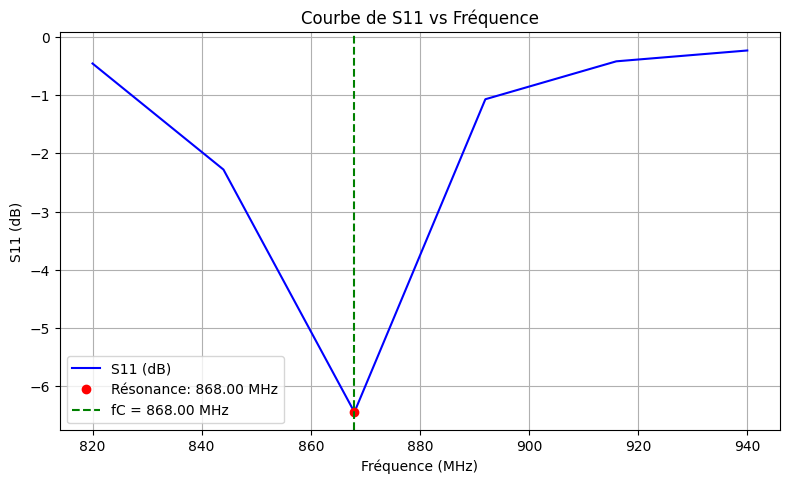

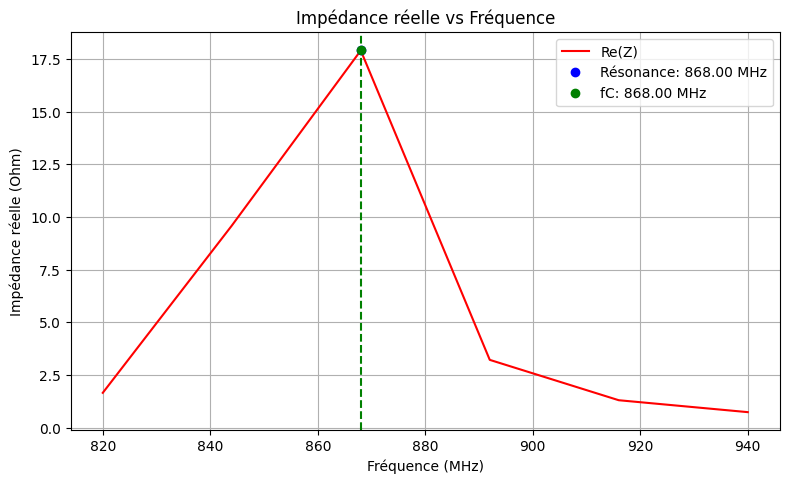

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12043479264990425
longueur_desiree = 0.08640552995391705 

wid = 0.7569268375239325
short feed = 22.553043864000816
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.46727076414971 db

Simulation Numéro 2

paramètre S11 = -0.8046182646385464 db

Simulation Numéro 3



paramètre S11 = -1.5343936902922974 db

Simulation Numéro 4

paramètre S11 = -3.315549855867924 db

Simulation Numéro 5

paramètre S11 = -7.072936804960532 db

Simulation Numéro 6

paramètre S11 = -6.217314845404852 db

R_I_min_index = 31.35379902841497

Fréquence de résonance : 916.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 0.8399890335115817

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 0.8399890335115817



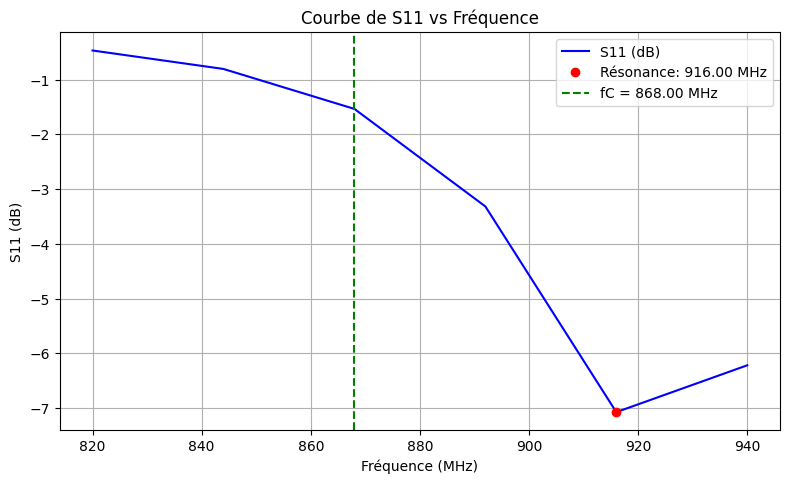

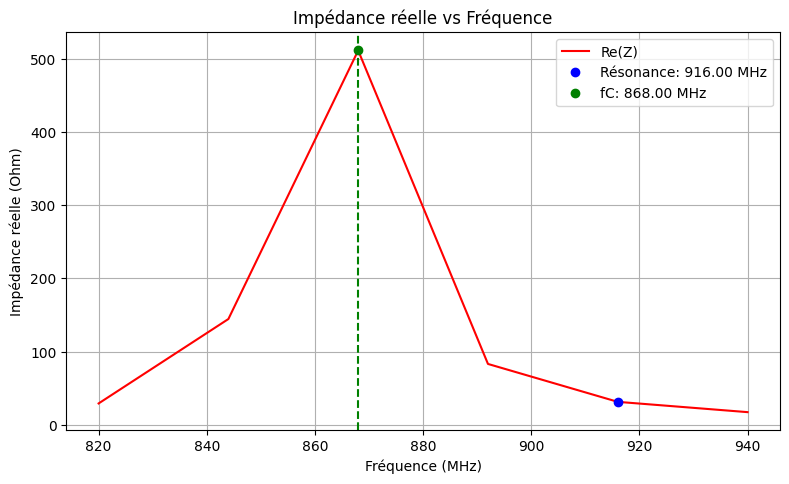

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12074379304535271
longueur_desiree = 0.08640552995391705 

wid = 0.679676738661819
short feed = 0.8399890335115817
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -1.753540649992201 db

Simulation Numéro 2

paramètre S11 = -2.3572798490834836 db

Simulation Numéro 3



paramètre S11 = -2.5694334944810633 db

Simulation Numéro 4

paramètre S11 = -2.245660403625161 db

Simulation Numéro 5

paramètre S11 = -1.7386611770411176 db

Simulation Numéro 6

paramètre S11 = -1.3063717826029821 db

R_I_min_index = 7.8647508850264085

Fréquence de résonance : 868.00 MHz

 
Opti Freq found but no matching yet ! 

R_I_min_index = 7.8647508850264085 Ohm

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 27.202371165950627

 Pas de convergence : |f_res - fC| = 0.00 Hz > 0.01

1...........short feed ...... dans la fonction = 27.202371165950627



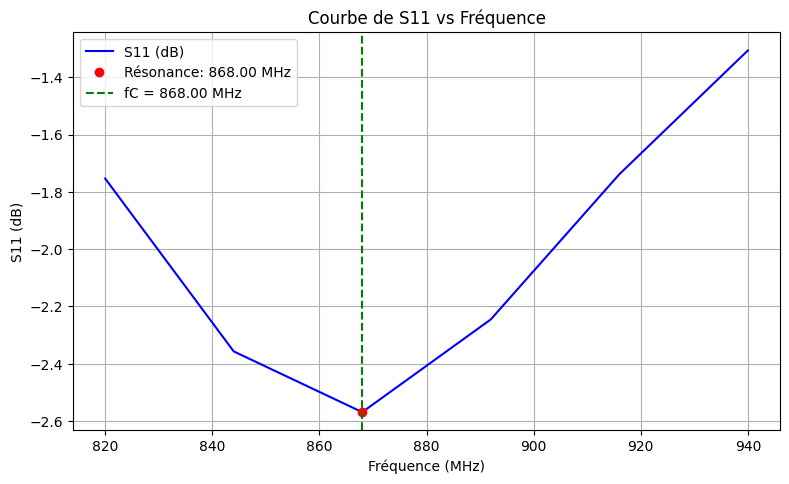

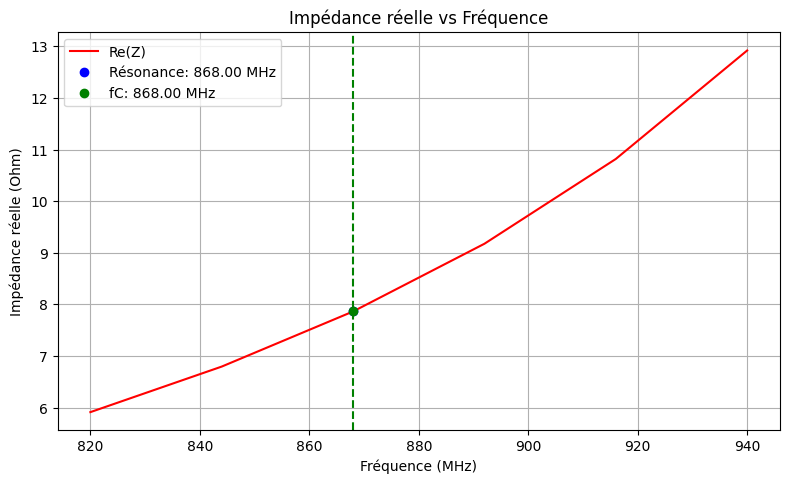

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12074379304535271
longueur_desiree = 0.08640552995391705 

wid = 0.679676738661819
short feed = 27.202371165950627
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.493758966328571 db

Simulation Numéro 2

paramètre S11 = -0.8444663152445469 db

Simulation Numéro 3



paramètre S11 = -1.5952170862420472 db

Simulation Numéro 4

paramètre S11 = -3.37831634255474 db

Simulation Numéro 5

paramètre S11 = -6.784230639949537 db

Simulation Numéro 6

paramètre S11 = -5.7875036443214665 db

R_I_min_index = 25.518553049039102

Fréquence de résonance : 916.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = -8.687399811932769

new_distance_short < 0.5 / 1000

new_distance_short = 1.1103105956569554

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 1.1103105956569554



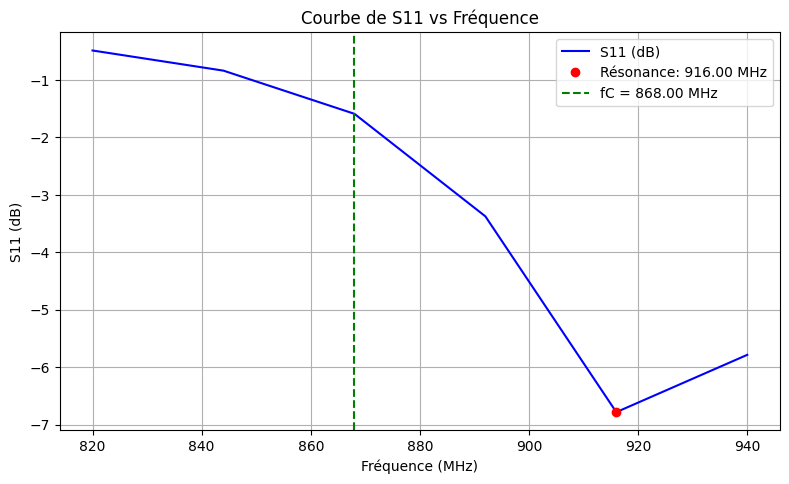

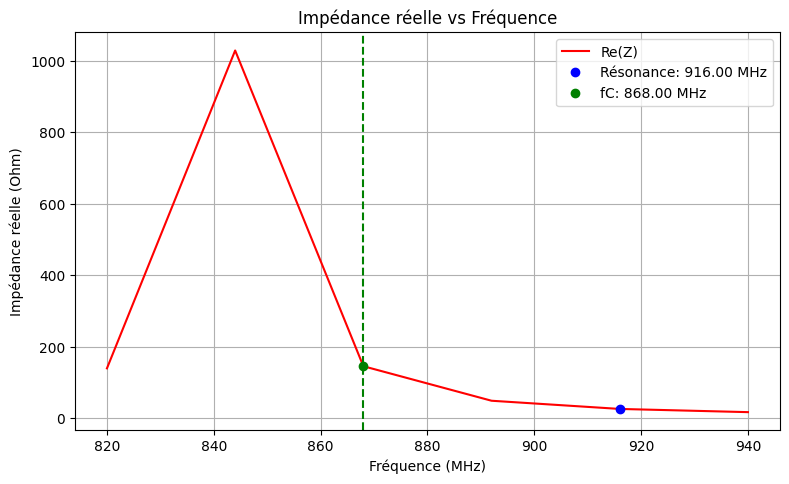

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12102125761737216
longueur_desiree = 0.08640552995391705 

wid = 0.6103105956569553
short feed = 1.1103105956569554
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.22313012749402272 db

Simulation Numéro 2

paramètre S11 = -1.0803336911877521 db

Simulation Numéro 3



paramètre S11 = -0.14581428745769792 db

Simulation Numéro 4

paramètre S11 = -0.05241790253877169 db

Simulation Numéro 5

paramètre S11 = -0.028291044891986285 db

Simulation Numéro 6

paramètre S11 = -0.018480967452249256 db

R_I_min_index = 3.1533757458919216

Fréquence de résonance : 844.00 MHz

f_resonance > fLow and f_resonance < fHigh

 Pas de convergence : |f_res - fC| = 0.03 Hz > 0.01

1...........short feed ...... dans la fonction = 17.605110921263012



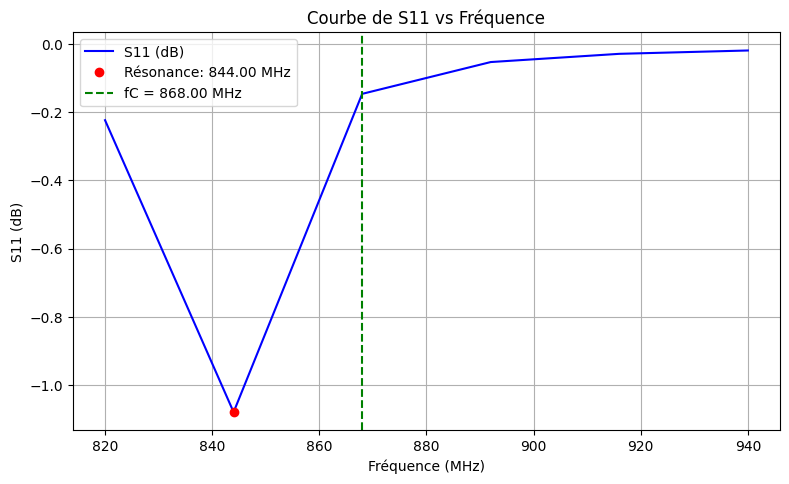

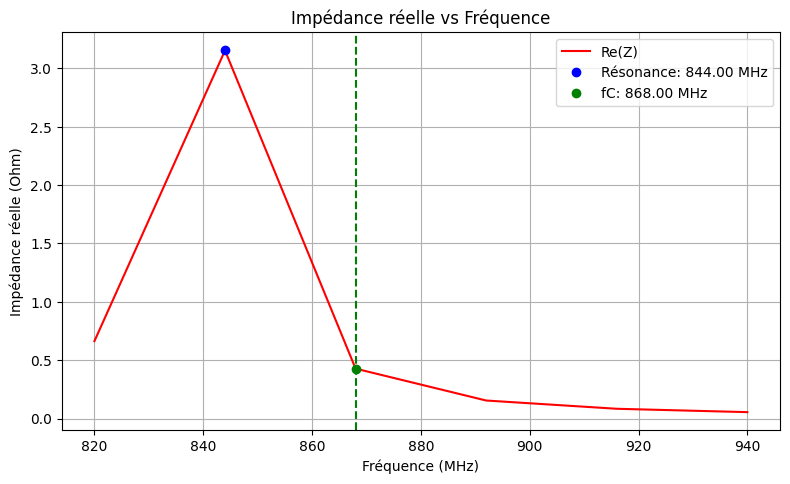

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12088044518192399
longueur_desiree = 0.08640552995391705 

wid = 0.6455137045189995
short feed = 17.605110921263012
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.9525428338712183 db

Simulation Numéro 2

paramètre S11 = -2.052764378779739 db

Simulation Numéro 3



paramètre S11 = -4.899812211349548 db

Simulation Numéro 4

paramètre S11 = -6.650220356996394 db

Simulation Numéro 5

paramètre S11 = -3.398422642473382 db

Simulation Numéro 6

paramètre S11 = -1.7431127782103606 db

R_I_min_index = 19.32938737560944

Fréquence de résonance : 892.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 1.0738753136575045

 Pas de convergence : |f_res - fC| = 0.03 Hz > 0.01

1...........short feed ...... dans la fonction = 1.0738753136575045



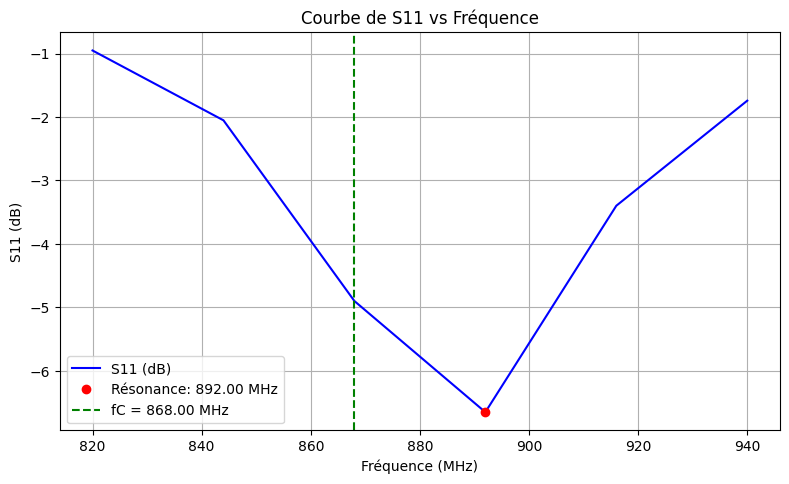

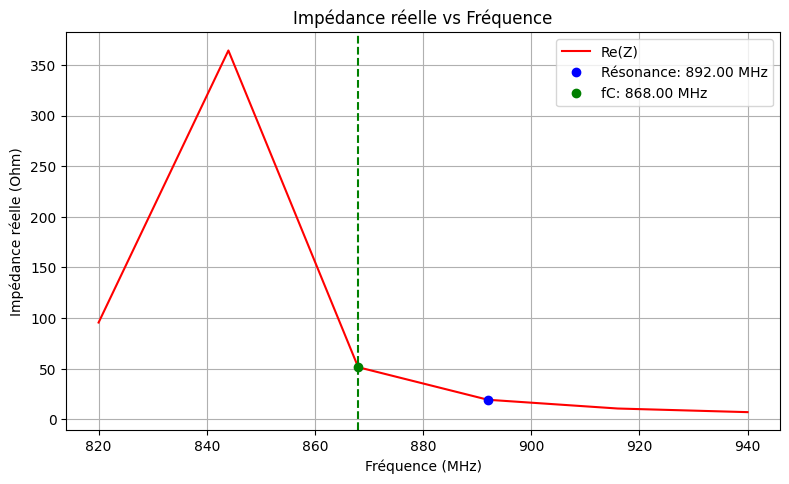

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12101752062522107
longueur_desiree = 0.08640552995391705 

wid = 0.6112448436947289
short feed = 1.0738753136575045
The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.20824135559769258 db

Simulation Numéro 2

paramètre S11 = -1.0029869001657434 db

Simulation Numéro 3



paramètre S11 = -0.1354970406424916 db

Simulation Numéro 4

paramètre S11 = -0.04875194126820513 db

Simulation Numéro 5

paramètre S11 = -0.026324545975092553 db

Simulation Numéro 6



In [ ]:
has_converged = False
max_iterations = 15

x, y, Nombre_meandre = ifa_creation_new(Lenght_antenna, a, b, wid, L_short)

# Nombre_meandre = 6

# Loop for simulation
iteration = 0
while not has_converged and iteration < max_iterations:
    # Affiche l'iteration
    print(f"\nIteration {iteration + 1}\n")
    print(f"wid = {wid * 1000}")
    print(f"short feed = {distance_short * 1000}")
    # x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    s11_db, f_resonance, new_distance_short, new_wid, new_Nombre_meandre, has_converged, impedances = simulate_freq_loop_test(
        fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point, distance_short, wid, Lenght_antenna, b, a, L_short, Nombre_meandre)
    distance_short = new_distance_short
    print(f"\n2...........short feed = {distance_short * 1000}")
    wid = new_wid
    Nombre_meandre = new_Nombre_meandre
    feed = t_b/2 - distance_short
    feed_wid = wid
    feed_point = [0, feed, 0]
    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)
    x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    iteration += 1

    if has_converged:
        print(f"On est dans la plage de convergence")
        # appel de la fonction qui met à jour les paramètres
        has_optimised = False
        while not has_optimised:
            print(f"\nIteration {iteration + 1}\n")
            print(f"wid = {wid * 1000}")
            print(f"short feed = {distance_short * 1000}")
            x_m, y_m = trace_meander_new(x, y, wid)
            feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
            feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
            antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)
            extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
            s11_db, f_resonance, new_distance_short, new_wid, has_optimised, impedances = loop_in_interval(
            fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point, distance_short, wid, b, Nombre_meandre)
            wid = new_wid
            distance_short = new_distance_short
            feed = t_b/2 - distance_short
            feed_wid = wid
            feed_point = [0, feed, 0]
            plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
            plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)
            x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    """ else:
        print("Convergence non atteinte")
        scale = f_resonance / fC
        print(f"Le Scale est : {scale}")
        # 5) Mise à jour des dimensions
        # wid      /= scale
        min_slot *= scale
        longueur_meandre *= scale
        print(f"f_resonance / fC = {f_resonance / fC}")
        print("\n") """


